# Project: Predicting Stock Price using Numerical Analysis Methods
------------------
- Import libraries

In [2]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from datetime import datetime

- Define functions for getting the data, interpolating the data using cublic spline, and estimating stock price using the trapezoidal rule.

In [3]:
# Function to get stock data
def get_stock_data(ticker, start, end):
    df = yf.download(ticker, start=start, end=end)
    return df

# Function to interpolate stock data using cubic spline
def interpolate_stock_data(dates, prices):
    interp = CubicSpline(dates, prices)
    return interp

# Function to estimate stock price using trapezoidal rule
def estimate_stock_price(interp, start_date, end_date, num_intervals):
    time_interval = np.linspace(start_date, end_date, num_intervals)
    estimated_prices = interp(time_interval)
    integral = np.trapz(estimated_prices, time_interval)
    return integral / (end_date - start_date)

- Declare the settings through parameters to be used in the functions below to estimate the stock price.

In [4]:
# Parameters
ticker = 'NVDA'
start = datetime(2022, 8, 1)
end = datetime(2022, 12, 31)
num_intervals = 1000
prediction_date = datetime(2023, 1, 3)

In [5]:
# Get stock data
stock_data = get_stock_data(ticker, start, end)
stock_data.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [6]:
# Convert dates to numerical values
stock_data['Timestamp'] = stock_data['Date'].apply(lambda x: x.timestamp())

# Interpolate stock prices
interp = interpolate_stock_data(stock_data['Timestamp'], stock_data['Close'])

# Estimate stock price
start_timestamp = stock_data['Timestamp'].iloc[0]
end_timestamp = stock_data['Timestamp'].iloc[-1]
estimated_price = estimate_stock_price(interp, start_timestamp, end_timestamp, num_intervals)
print(f"Estimated stock price for {ticker} on {prediction_date}: ${estimated_price:.2f}")

Estimated stock price for NVDA on 2023-01-03 00:00:00: $149.82


- Plot the data intervals from the start date to the end date and the estimated stock price.

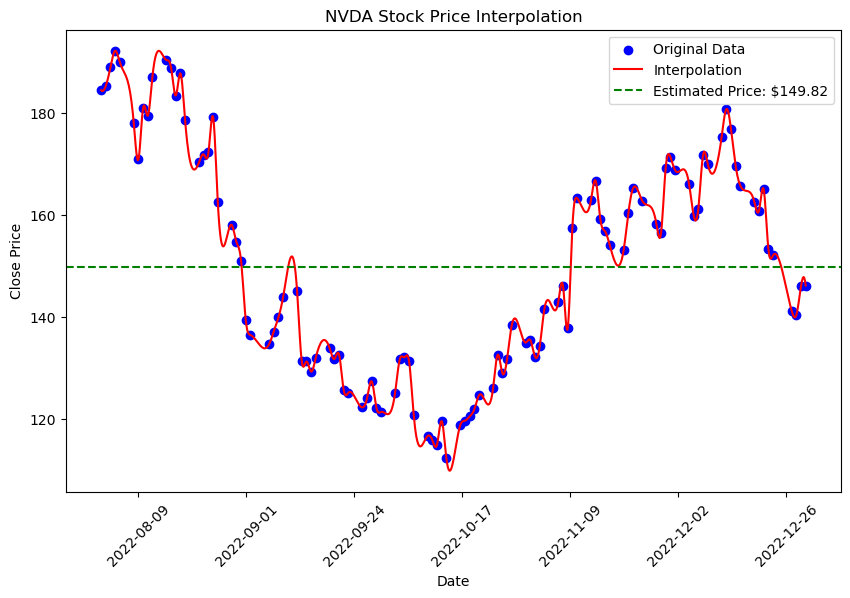

In [7]:
# Plot stock data and interpolation
plt.figure(figsize=(10, 6))
plt.scatter(stock_data['Timestamp'], stock_data['Close'], label='Original Data', color='blue')
date_range = np.linspace(stock_data['Timestamp'].min(), stock_data['Timestamp'].max(), num_intervals)
plt.plot(date_range, interp(date_range), label='Interpolation', color='red')

# Add the estimated stock price as a horizontal line
plt.axhline(y=estimated_price, color='green', linestyle='--', label=f'Estimated Price: ${estimated_price:.2f}')

# Convert timestamp values back to datetime objects for display on the x-axis
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: datetime.fromtimestamp(x).strftime('%Y-%m-%d')))

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(f'{ticker} Stock Price Interpolation')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

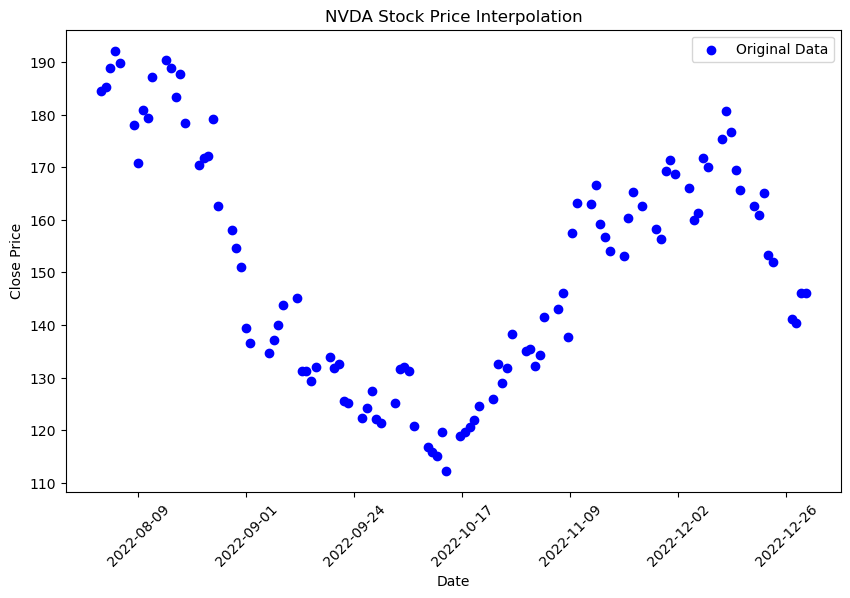

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(stock_data['Timestamp'], stock_data['Close'], label='Original Data', color='blue')
date_range = np.linspace(stock_data['Timestamp'].min(), stock_data['Timestamp'].max(), num_intervals)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: datetime.fromtimestamp(x).strftime('%Y-%m-%d')))
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(f'{ticker} Stock Price Interpolation')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()